# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.isnull().any()
# there is no missing value

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

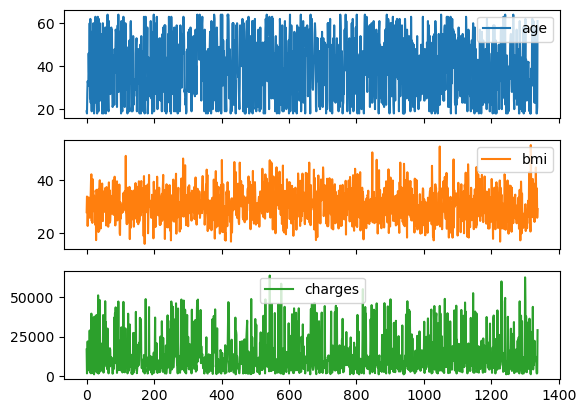

In [3]:
df.plot(y=["age","bmi","charges"],kind="line", subplots=True)
# there are no clear outliners

In [4]:
# Converting values from non numeric to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df.columns
npa = scaler.fit_transform(df)
df = pd.DataFrame(npa, columns = cols)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


In [6]:
from sklearn.decomposition import PCA
# reducing the data with using Principal Components because there are 7 attributes and humans cant understand
# 7D data so we will make the df 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df)
X_reduced

array([[ 0.86550954,  0.81208251],
       [-1.13864807, -0.24489118],
       [-0.7053086 , -0.64142346],
       ...,
       [-1.31718035, -0.46139248],
       [-1.58050269,  0.10570459],
       [ 2.28660847,  0.72035023]])

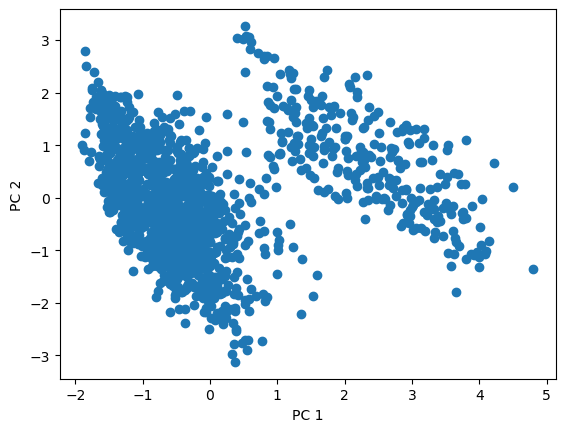

In [7]:
import matplotlib.pyplot as plt

# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

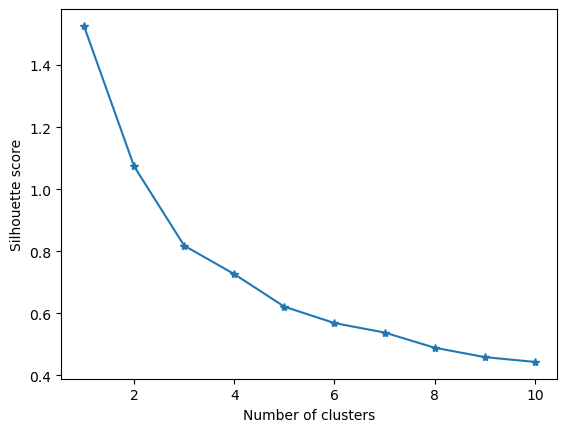

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_reduced) 
    wcss.append(sum(np.min(cdist(X_reduced, kmeans.cluster_centers_,'euclidean'), axis=1)) / X_reduced.shape[0])

# Plot the silhouette scores
plt.plot(range(1, 11), wcss, marker="*")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()
# looks 2 is the best for clusters number

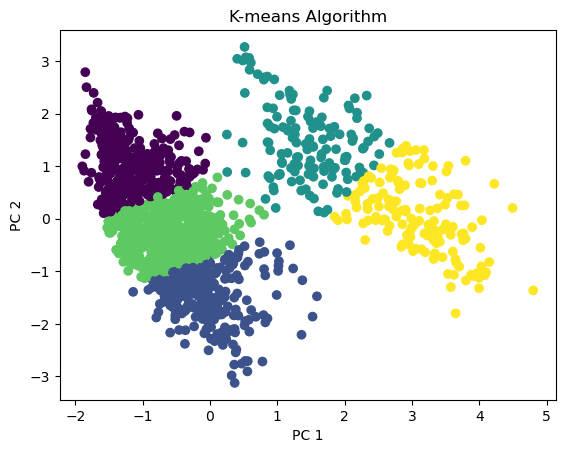

In [9]:
# Build the K-means Algotithm model
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_reduced)
y_pred_kmaens = kmeans.predict(X_reduced)

#Plot for K-means Algorithm prediction
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=y_pred_kmaens)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("K-means Algorithm")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
# Build the Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_reduced)
y_pred_agg = agg.fit_predict(X_reduced)

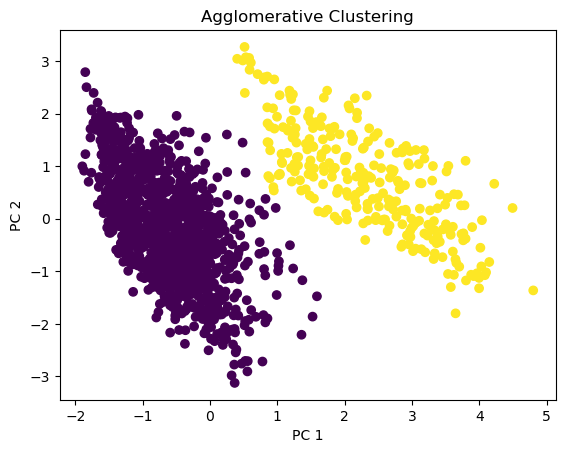

In [11]:
#Plot for Agglomerative Clustering prediction
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_agg)
plt.xlabel("PC 1")
plt.title("Agglomerative Clustering")
plt.ylabel("PC 2")
plt.show()

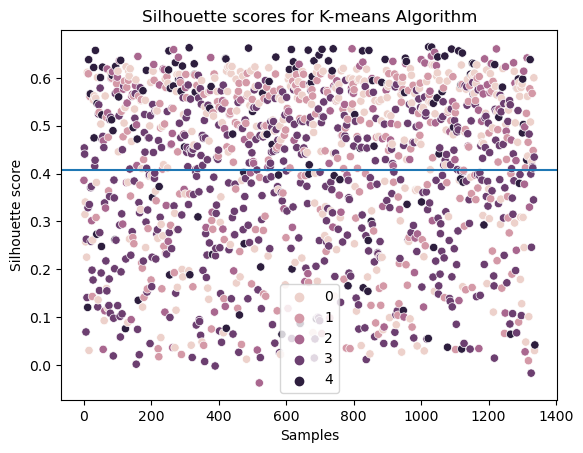

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

# Calculate the silhouette scores for each sample for K-means Algorithm
sample_silhouette_values = silhouette_samples(X_reduced, y_pred_kmaens)

# Create a silhouette plot
sns.scatterplot(x=range(len(sample_silhouette_values)), y=sample_silhouette_values, hue=y_pred_kmaens)
plt.xlabel("Samples")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for K-means Algorithm")
plt.axhline(y=silhouette_score(X_reduced, y_pred_kmaens))
plt.show()


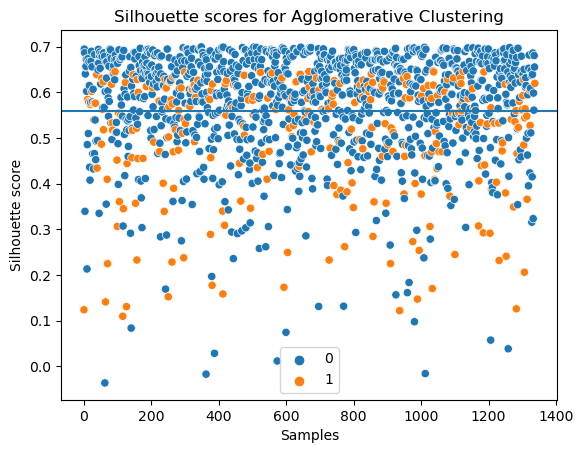

In [13]:
# Calculate the silhouette scores for each sample for Agglomerative Clustering
sample_silhouette_values = silhouette_samples(X_reduced, y_pred_agg)

# Create a silhouette plot
sns.scatterplot(x=range(len(sample_silhouette_values)), y=sample_silhouette_values, hue=y_pred_agg)
plt.xlabel("Samples")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for Agglomerative Clustering")
plt.axhline(y=silhouette_score(X_reduced, y_pred_agg))
plt.show()


In [14]:
# Silhouette score of Agglomerative Clustering Algorithm
aggScore = silhouette_score(X_reduced, y_pred_agg)
aggScore

0.5597013061808779

In [15]:
# Silhouette score of K-Means Algorithm
kmeansScore = silhouette_score(X_reduced, y_pred_kmaens)
kmeansScore

0.40688776342704974

In [16]:
# So that says Agglomerative Clustering is better than K-Means algorithm for this samples